<a href="https://colab.research.google.com/github/ArtfulMonster/Machine-Learning/blob/main/Homework_1_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("D3.csv")

# Display the first 5 rows of the DataFrame
print(data.head())


         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375


In [98]:

# Separate columns
x1 = data.values[:, 0]  # get input values from first column
x2 = data.values[:, 1]  # get input values from second column
x3 = data.values[:, 2]  #third column
y = data.values[:, 3]   #fourth column

m1 = len(x1)  # Number of training examples
m2 = len(x2)
m3 = len(x3)
n = len(y)  # Number of training examples

# Display first 5 lines and the number of training examples
print('x1 = ', x1[: 5])
print('y = ', y[: 5])
print('m1 = ', m1)
print('n = ', n)

x1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m1 =  100
n =  100


In [99]:
print('x1 = ', x1[: 97])
print('y = ', y[: 97])


x1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616 0.2020202
 0.24242424 0.28282828 0.32323232 0.36363636 0.4040404  0.44444444
 0.48484848 0.52525252 0.56565657 0.60606061 0.64646465 0.68686869
 0.72727273 0.76767677 0.80808081 0.84848485 0.88888889 0.92929293
 0.96969697 1.01010101 1.05050505 1.09090909 1.13131313 1.17171717
 1.21212121 1.25252525 1.29292929 1.33333333 1.37373737 1.41414141
 1.45454546 1.49494949 1.53535354 1.57575758 1.61616162 1.65656566
 1.6969697  1.73737374 1.77777778 1.81818182 1.85858586 1.8989899
 1.93939394 1.97979798 2.02020202 2.06060606 2.1010101  2.14141414
 2.18181818 2.22222222 2.26262626 2.3030303  2.34343434 2.38383838
 2.42424242 2.46464646 2.5050505  2.54545455 2.58585859 2.62626263
 2.66666667 2.70707071 2.74747475 2.78787879 2.82828283 2.86868687
 2.90909091 2.94949495 2.98989899 3.03030303 3.07070707 3.11111111
 3.15151515 3.19191919 3.23232323 3.27272727 3.31313131 3.35353535
 3.39393939 3.43434343 3.47474748 3.51515151 3.55555556 3.

In [100]:
from IPython.display import display
display(data)



,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


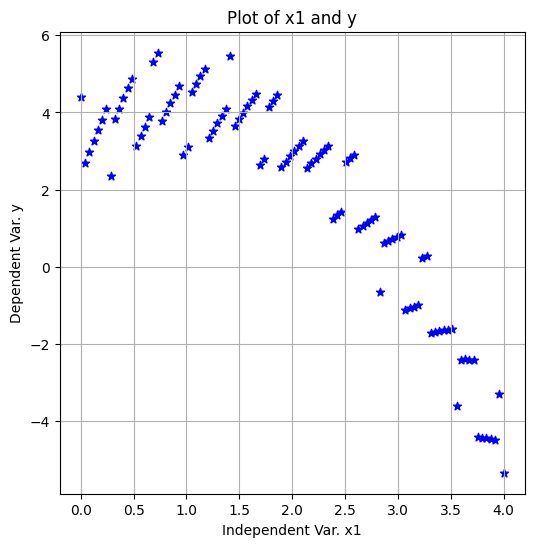

In [101]:
x1 = data.values[:, 0]  # get input values from first column
y = data.values[:, 3]   # from output column

# Scatter plot
plt.scatter(x1, y, color='blue', marker='*')

# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('Independent Var. x1')
plt.ylabel('Dependent Var. y')
plt.title('Plot of x1 and y')

# Show the plot
plt.show()

In [102]:
#We walk through the initial steps of building a linear regression model from scratch using NumPy.

#Let's break down what you're doing:
#X_0 = np.ones((m, 1)): We're creating a column vector of ones.
#This will be used as the "bias" term for the linear regression model.

#X_1 = X.reshape(m, 1): You're reshaping features (X) to make it a 2D array suitable for matrix operations.
#X = np.hstack((X_0, X_1)): We're horizontally stacking X_0 and X_1 to create final feature matrix X.


X_0 = np.ones((m1, 1))
X_0[:5]



array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [103]:
#reshape x1
X_1 = x1.reshape(m1, 1)

#reshape x2
X_2 = x2.reshape(m2, 1)

#reshape x3
X_3 = x3.reshape(m3, 1)



In [104]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)

X_s1 = np.hstack((X_0, X_1))
X_s1[:5]

X_s2 = np.hstack((X_0, X_2))

X_s3 = np.hstack((X_0, X_3))

In [105]:
theta = np.zeros(2)
theta


array([0., 0.])

In [106]:
#create cost computing function

def compute_cost(X_s, y, theta):

  predictions = X_s.dot(theta)
  errors = np.subtract(predictions, y)
  sqrErrors = np.square(errors)
  C = 1 / (2 * m1) * np.sum(sqrErrors)
  return C

cost1 = compute_cost(X_s1, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost1)

cost2 = compute_cost(X_s2, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost2)

cost3 = compute_cost(X_s3, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost3)

The cost for given values of theta_0 and theta_1 = 5.524438459196242
The cost for given values of theta_0 and theta_1 = 5.524438459196242
The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [107]:
#creating gradient descent parameters

def gradient_descent(X_s, y, theta, alpha, iterations):

  m = len(y)  # Number of training examples
  cost_history = np.zeros(iterations)

  for i in range(iterations):
        predictions = X_s.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X_s.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X_s, y, theta)

  return theta, cost_history

Final value of theta1 = [ 5.71850653 -1.9568206 ]
Final value of theta2 = [0.71988473 0.56390334]
Final value of theta3 = [ 2.78048129 -0.48451631]


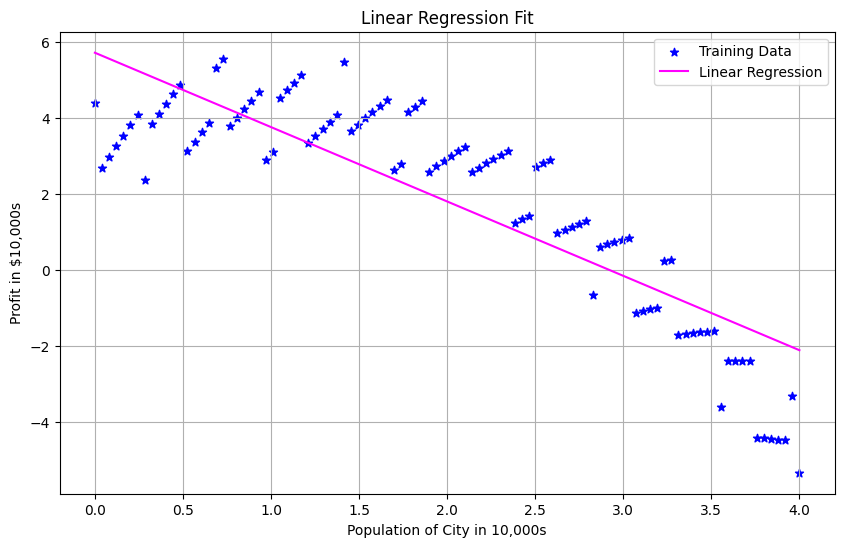

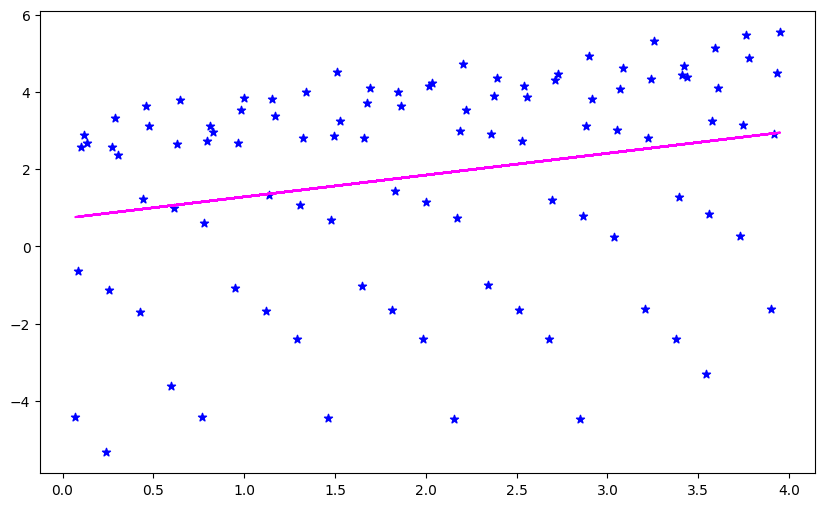

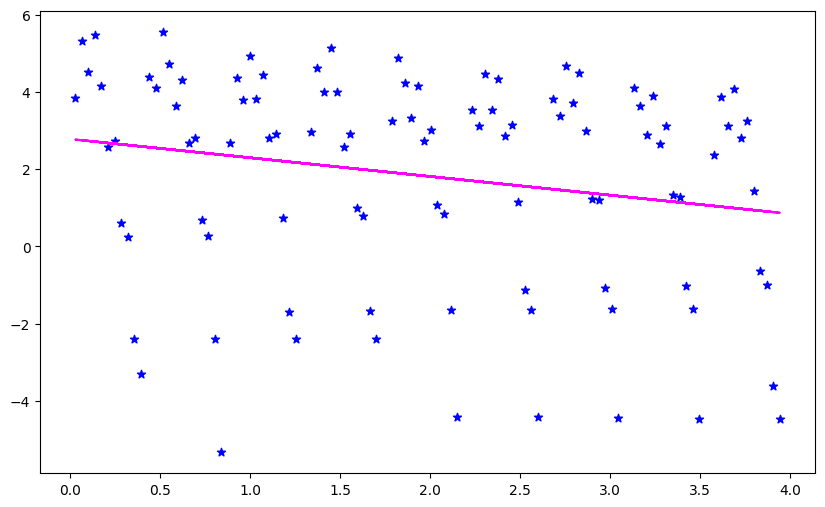

In [110]:
theta = [0., 0.]
iterations = 1500
alpha = 0.01

theta1, cost_history1 = gradient_descent(X_s1, y, theta, alpha, iterations)
print('Final value of theta1 =', theta1)
#print('cost_history =', cost_history)

theta2, cost_history2 = gradient_descent(X_s2, y, theta, alpha, iterations)
print('Final value of theta2 =', theta2)
#print('cost_history =', cost_history)

theta3, cost_history3 = gradient_descent(X_s3, y, theta, alpha, iterations)
print('Final value of theta3 =', theta3)
#print('cost_history =', cost_history)



# Scatter plot for the training data x1
plt.scatter(X_s1[:, 1], y, color='blue', marker='*', label='Training Data')

# Line plot for the linear regression model
plt.plot(X_s1[:, 1], X_s1.dot(theta1), color='magenta', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')      # fix labelsssss
plt.title('Linear Regression Fit')
plt.legend()

# Show the plot
plt.show()


# Scatter plot for the training data x2
plt.scatter(X_s2[:, 1], y, color='blue', marker='*', label='Training Data')

# Line plot for the linear regression model
plt.plot(X_s2[:, 1], X_s2.dot(theta2), color='magenta', label='Linear Regression')

plt.show()


# Scatter plot for the training data x3
plt.scatter(X_s3[:, 1], y, color='blue', marker='*', label='Training Data')

# Line plot for the linear regression model
plt.plot(X_s3[:, 1], X_s3.dot(theta3), color='magenta', label='Linear Regression')

plt.show()

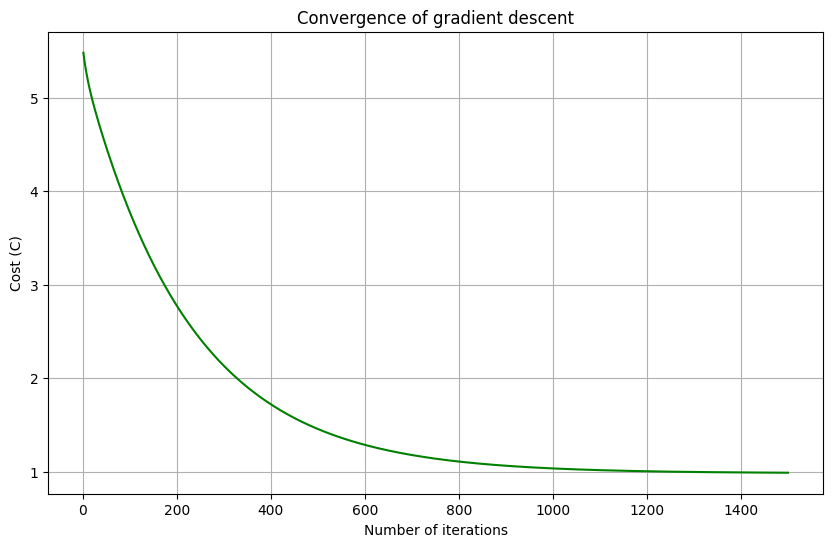

In [114]:
plt.plot(range(1, iterations + 1), cost_history1, color='green')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (C)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

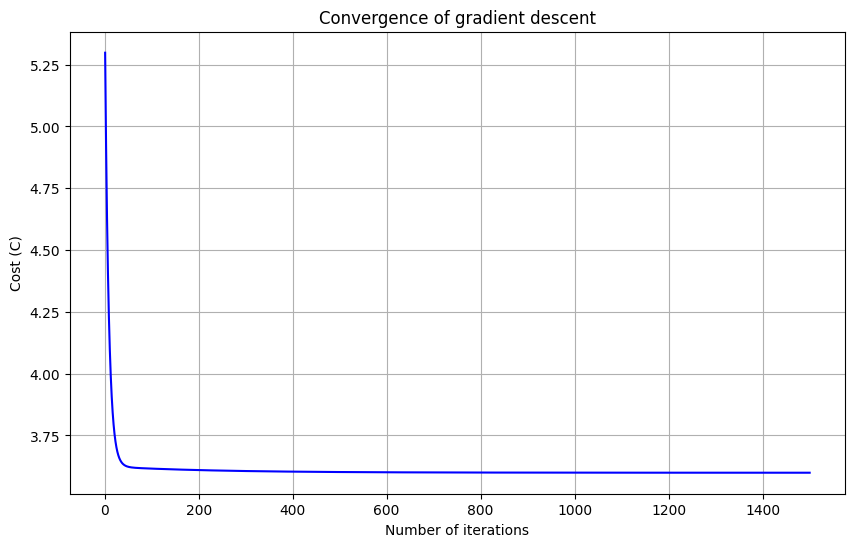

In [115]:
plt.plot(range(1, iterations + 1), cost_history2, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (C)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()


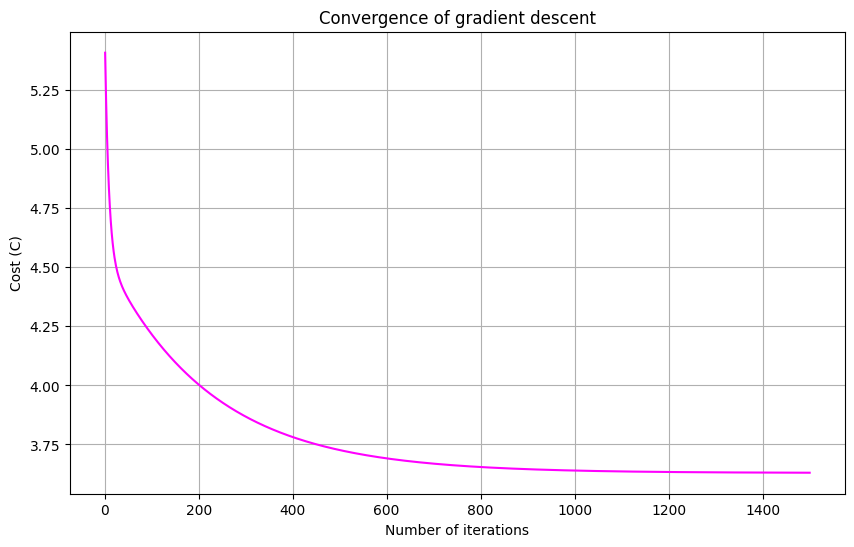

In [116]:
plt.plot(range(1, iterations + 1), cost_history3, color='magenta')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (C)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()